### NGÔ TRƯỜNG AN - 2001190017

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('breast-cancer.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:

data1=data.copy()

In [4]:
#New data with "M"=1 and "B"=0
data1.replace({"diagnosis":{'M':1,'B':0}},inplace=True)

In [7]:
data1.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

B    357
M    212
Name: diagnosis, dtype: int64


c:\Users\An Ngo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


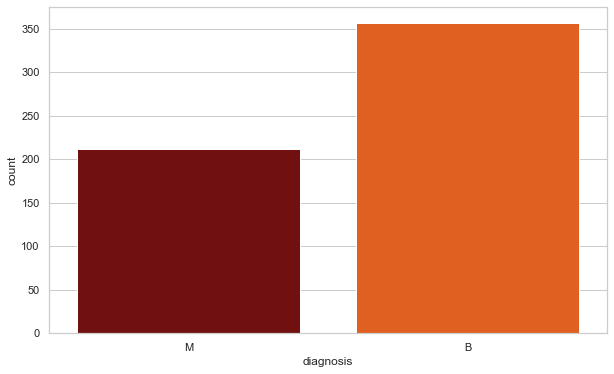

In [125]:
sns.set(style="whitegrid")
print(data['diagnosis'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('diagnosis', data=data, palette='gist_heat')
plt.show()

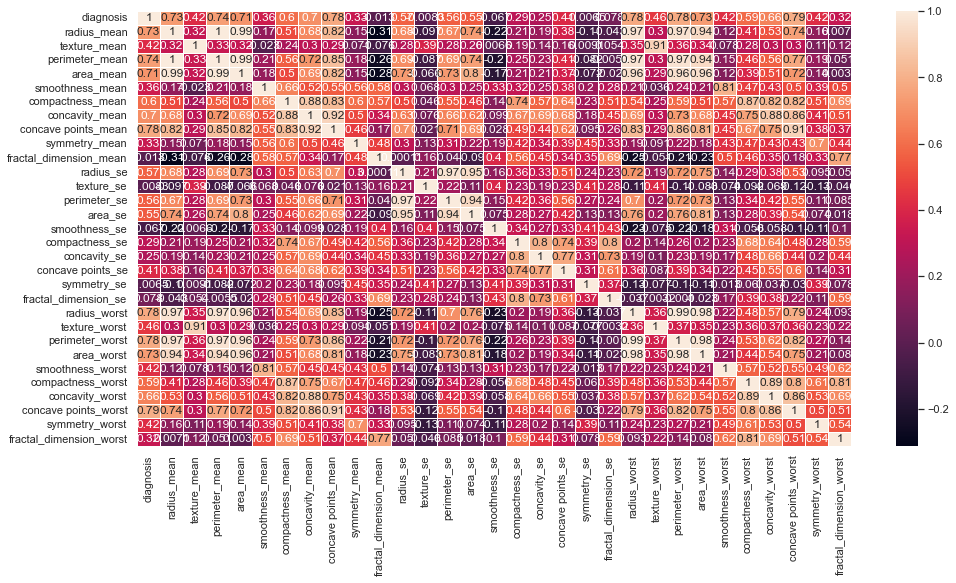

In [10]:
plt.figure(figsize=(16,8))  
corr=data1.drop(["id"],axis=1).corr() 
sns.heatmap(corr,annot=True,linewidth=1) 
plt.show()


diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

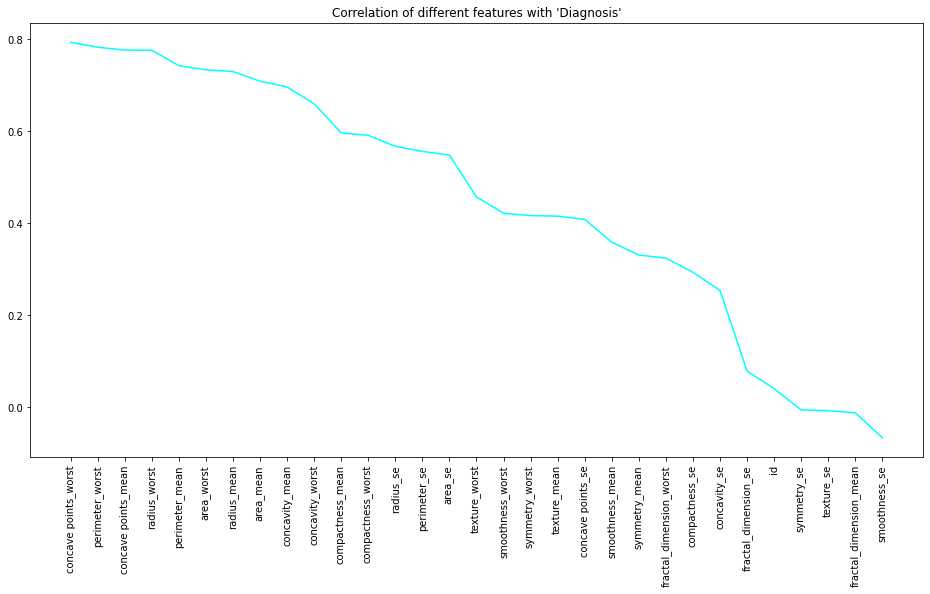

In [9]:
#Cvorrealtion of features in descending order
print(data1.corr()['diagnosis'].sort_values(ascending=False)) 

plt.figure(figsize=(16,8))
plt.plot(data1.corr()['diagnosis'].sort_values(ascending=False)[1:],color="cyan") 
plt.title("Correlation of different features with 'Diagnosis'")
plt.xticks(rotation=90)
plt.show()


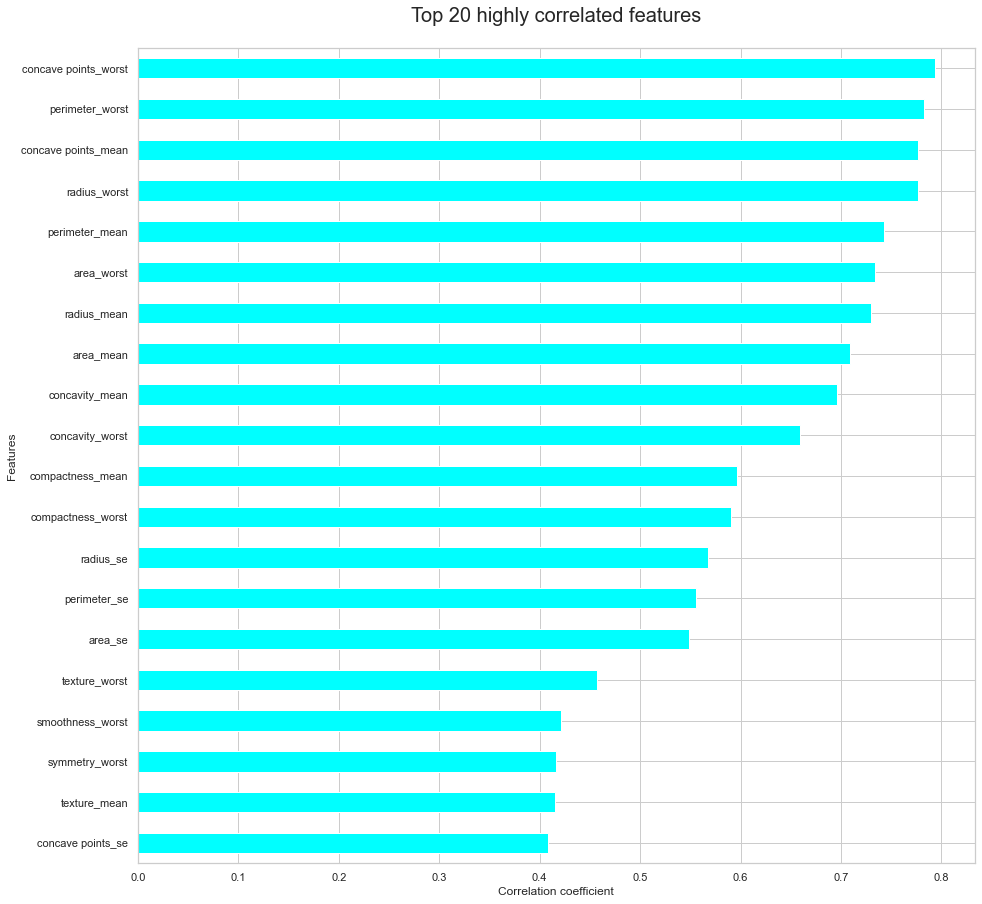

In [127]:
plt.figure(figsize=(15,15))
data1.corr().diagnosis.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:21][::-1].plot(kind='barh',color='cyan') 
plt.title("Top 20 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()


In [5]:
data1 = data1.astype(float)

In [6]:
selected_features = data1.corr().diagnosis.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].index

In [7]:
print(selected_features)

Index(['concavity_worst', 'concavity_mean', 'area_mean', 'radius_mean',
       'area_worst', 'perimeter_mean', 'radius_worst', 'concave points_mean',
       'perimeter_worst', 'concave points_worst'],
      dtype='object')


In [13]:
data1.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
X=data1.iloc[:500,2:32]
Y=data1.iloc[:500,1]

X_new=data1.iloc[500:,2:32]
Y_new=data1.iloc[500:,1]

for col in X.columns:
    X[col][np.isinf(X[col])]=X[col].mean()

In [9]:
print(X.shape)
print(Y.shape)

(500, 30)
(500,)


In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [12]:
X_train

,concavity_worst,concavity_mean,area_mean,radius_mean,area_worst,perimeter_mean,radius_worst,concave points_mean,perimeter_worst,concave points_worst
107,0.1937,0.02643,466.7,12.360,544.1,79.01,13.290,0.01921,85.56,0.08442
336,0.1450,0.03738,514.3,12.990,576.0,84.08,13.720,0.02098,87.38,0.05850
71,0.1434,0.08606,244.0,8.888,284.4,58.79,9.733,0.02872,62.56,0.04786
474,0.3365,0.05115,358.9,10.880,433.1,70.41,11.940,0.01571,80.78,0.07966
6,0.3784,0.11270,1040.0,18.250,1606.0,119.60,22.880,0.07400,153.20,0.19320
...,...,...,...,...,...,...,...,...,...,...
323,0.5344,0.25650,1264.0,20.340,1938.0,135.90,25.300,0.15040,171.10,0.26850
192,0.0000,0.00000,288.1,9.720,303.8,60.73,9.968,0.00000,62.25,0.00000
117,0.4704,0.16900,682.5,14.870,1095.0,98.64,18.810,0.08923,127.10,0.20270
47,0.5006,0.12260,534.6,13.170,759.4,85.98,15.670,0.07340,102.80,0.20880


In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(400, 10)
(400,)
(100, 10)
(100,)


In [13]:
X_train

,concavity_worst,concavity_mean,area_mean,radius_mean,area_worst,perimeter_mean,radius_worst,concave points_mean,perimeter_worst,concave points_worst
107,0.1937,0.02643,466.7,12.360,544.1,79.01,13.290,0.01921,85.56,0.08442
336,0.1450,0.03738,514.3,12.990,576.0,84.08,13.720,0.02098,87.38,0.05850
71,0.1434,0.08606,244.0,8.888,284.4,58.79,9.733,0.02872,62.56,0.04786
474,0.3365,0.05115,358.9,10.880,433.1,70.41,11.940,0.01571,80.78,0.07966
6,0.3784,0.11270,1040.0,18.250,1606.0,119.60,22.880,0.07400,153.20,0.19320
...,...,...,...,...,...,...,...,...,...,...
323,0.5344,0.25650,1264.0,20.340,1938.0,135.90,25.300,0.15040,171.10,0.26850
192,0.0000,0.00000,288.1,9.720,303.8,60.73,9.968,0.00000,62.25,0.00000
117,0.4704,0.16900,682.5,14.870,1095.0,98.64,18.810,0.08923,127.10,0.20270
47,0.5006,0.12260,534.6,13.170,759.4,85.98,15.670,0.07340,102.80,0.20880


In [13]:
#Feature Scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train.values)
X_test=scaler.transform(X_test.values)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [15]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['Neural Network',MLPClassifier(random_state=1,hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 7)   #K-Fold Validation
    precision = precision_score(Y_test, y_pred)  #Precision Score
    recall = recall_score(Y_test, y_pred)  #Recall Score
    f1 = f1_score(Y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(Y_test, y_pred))
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('Precision: {:.2f}'.format(precision))
    print('Recall: {:.2f}'.format(recall))
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(Y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[59  4]
 [ 0 37]]
Accuracy Score:  0.96
K-Fold Validation Mean Accuracy: 94.25 %
Standard Deviation: 2.60 %
Precision: 0.90
Recall: 1.00
F1: 0.95
-----------------------------------
SVM :
[[61  2]
 [ 2 35]]
Accuracy Score:  0.96
K-Fold Validation Mean Accuracy: 95.00 %
Standard Deviation: 2.56 %
Precision: 0.95
Recall: 0.95
F1: 0.95
-----------------------------------
KNeighbors :
[[58  5]
 [ 3 34]]
Accuracy Score:  0.92
K-Fold Validation Mean Accuracy: 95.25 %
Standard Deviation: 1.22 %
Precision: 0.87
Recall: 0.92
F1: 0.89
-----------------------------------
GaussianNB :
[[58  5]
 [ 2 35]]
Accuracy Score:  0.93
K-Fold Validation Mean Accuracy: 93.51 %
Standard Deviation: 2.59 %
Precision: 0.88
Recall: 0.95
F1: 0.91
-----------------------------------
Decision Tree :
[[52 11]
 [ 0 37]]
Accuracy Score:  0.89
K-Fold Validation Mean Accuracy: 93.00 %
Standard Deviation: 2.80 %
Precision: 0.77
Recall: 1.00
F1: 0.87
-----------------------------------
Random Forest :

In [16]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'Precision', 'Recall', 'F1'])

In [17]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [19]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,Precision,Recall,F1
1,SVM,96.0,94.996111,2.561067,0.945946,0.945946,0.945946
0,Logistic Regreesion,96.0,94.252874,2.596604,0.902439,1.000000,0.948718
6,Neural Network,94.0,95.251059,2.238997,0.860465,1.000000,0.925000
5,Random Forest,94.0,94.754127,2.082811,0.878049,0.972973,0.923077
3,GaussianNB,93.0,93.505315,2.586350,0.875000,0.945946,0.909091
2,KNeighbors,92.0,95.251059,1.222923,0.871795,0.918919,0.894737
4,Decision Tree,89.0,93.004062,2.800270,0.770833,1.000000,0.870588


In [18]:
models = df['Model'].values.tolist()
models

['SVM',
 'Logistic Regreesion',
 'Neural Network',
 'Random Forest',
 'GaussianNB',
 'KNeighbors',
 'Decision Tree']

In [19]:
accuracies = df['Accuracy'].values.tolist()

In [22]:
accuracies

[96.0, 96.0, 94.0, 94.0, 93.0, 92.0, 89.0]

In [20]:
dict_accuracies = dict(zip(models, accuracies))

In [23]:
dict_accuracies

{'SVM': 96.0,
 'Logistic Regreesion': 96.0,
 'Neural Network': 94.0,
 'Random Forest': 94.0,
 'GaussianNB': 93.0,
 'KNeighbors': 92.0,
 'Decision Tree': 89.0}

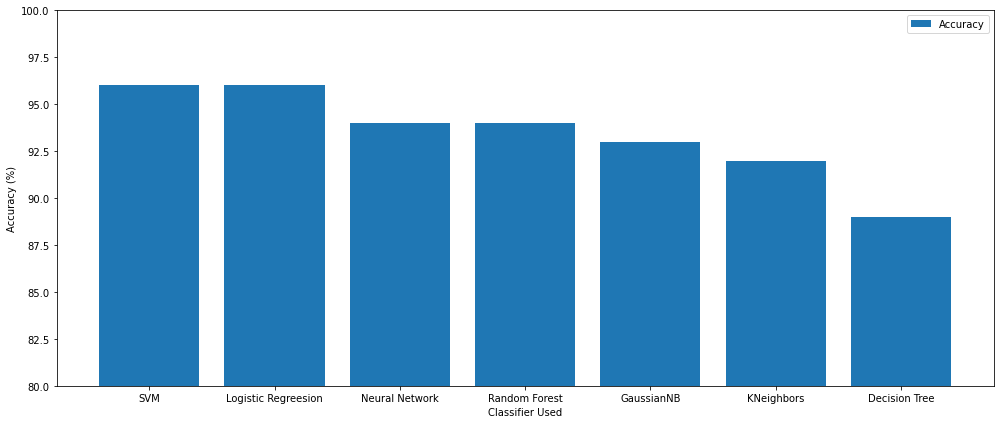

In [34]:
#Plot accuracy for different models
plt.figure(figsize=(14,6))
plt.bar(dict_accuracies.keys(),dict_accuracies.values(),label="Accuracy")
plt.xlabel("Classifier Used")
plt.ylabel("Accuracy (%)")
plt.ylim(80,100)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
model = LogisticRegression(random_state=0)
model.fit(X_train, Y_train)
print(model.score(X_test,Y_test))

0.96


In [29]:
y_pred_logr = model.predict(X_test)
precision = precision_score(Y_test, y_pred_logr)  #Precision Score
recall = recall_score(Y_test, y_pred_logr)  #Recall Score
f1 = f1_score(Y_test, y_pred_logr)  #F1 Score
print('Accuracy Score: ',accuracy_score(Y_test, y_pred_logr))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1: {:.2f}'.format(f1))

Accuracy Score:  0.96
Precision: 0.90
Recall: 1.00
F1: 0.95


In [30]:
import pickle
pickle.dump(model, open("breastcancer_prediction_model.pkl", 'wb'))

In [31]:
X_new.shape

(69, 30)

In [32]:

new_data = X_new[selected_features]

In [33]:
new_data

,concavity_worst,concavity_mean,area_mean,radius_mean,area_worst,perimeter_mean,radius_worst,concave points_mean,perimeter_worst,concave points_worst
500,0.1856,0.07721,689.4,15.040,856.9,98.73,16.760,0.06142,109.70,0.10180
501,0.3381,0.13570,595.9,13.820,788.0,92.33,16.010,0.06759,106.00,0.15210
502,0.1889,0.05928,476.3,12.540,552.0,81.25,13.570,0.03279,86.67,0.08411
503,0.3794,0.16760,1682.0,23.090,2782.0,152.10,30.790,0.10030,211.50,0.22640
504,0.2099,0.09730,248.7,9.268,300.2,61.49,10.280,0.05252,69.05,0.10250
...,...,...,...,...,...,...,...,...,...,...
564,0.4107,0.24390,1479.0,21.560,2027.0,142.00,25.450,0.13890,166.10,0.22160
565,0.3215,0.14400,1261.0,20.130,1731.0,131.20,23.690,0.09791,155.00,0.16280
566,0.3403,0.09251,858.1,16.600,1124.0,108.30,18.980,0.05302,126.70,0.14180
567,0.9387,0.35140,1265.0,20.600,1821.0,140.10,25.740,0.15200,184.60,0.26500


In [34]:
new_data = scaler.transform(new_data.values)

In [35]:
new_data

array([[-4.60867373e-01, -1.75637381e-01,  9.31383675e-02,
         2.52958764e-01, -5.93114324e-02,  2.72866789e-01,
         8.11982915e-02,  2.99239812e-01,  5.18127787e-02,
        -2.30433106e-01],
       [ 2.70482020e-01,  5.60408233e-01, -1.75193344e-01,
        -9.60406278e-02, -1.81403009e-01,  6.50302166e-03,
        -7.47762977e-02,  4.57077039e-01, -5.94476497e-02,
         5.27787344e-01],
       [-4.45041452e-01, -4.01270786e-01, -5.18428346e-01,
        -4.62203924e-01, -5.99597670e-01, -4.54639250e-01,
        -5.82213628e-01, -4.33155618e-01, -6.40708213e-01,
        -4.97091551e-01],
       [ 4.68545823e-01,  9.61841899e-01,  2.94175929e+00,
         2.55578262e+00,  3.35198747e+00,  2.49409089e+00,
         2.99896294e+00,  1.29384457e+00,  3.11297808e+00,
         1.64778296e+00],
       [-3.44331044e-01,  7.71777395e-02, -1.17160800e+00,
        -1.39820885e+00, -1.04579011e+00, -1.27703738e+00,
        -1.26642216e+00,  7.15653684e-02, -1.17054842e+00,
        -2.

# Dự đoán cho dữ liệu mới

In [36]:
predict_new_data = model.predict(new_data)

In [37]:
print(predict_new_data)

[0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]


In [38]:
print(np.array(Y_new).reshape(1,-1))

[[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]]


In [39]:
print(model.score(new_data,Y_new))
cm = confusion_matrix(Y_new, predict_new_data)
print(cm)

0.9710144927536232
[[51  1]
 [ 1 16]]


In [61]:
#1
list_features = [0.9387,	0.35140,	1265.0,	20.600,	1821.0,	140.10,	25.740,	0.15200,	184.60,	0.26500]

In [53]:
#0
list_features = [0.0000,	0.00000,	181.0,	7.760,	268.6,	47.92,	9.456,	0.00000,	59.16,	0.00000]

In [62]:

features = scaler.transform(np.array(list_features).reshape(1,-1))
print(features)

[[3.15079969 3.27480452 1.74502856 1.84348058 1.64908464 1.99465883
  1.94873404 2.61640286 2.3040847  2.22963802]]


In [63]:
model = pickle.load(open("breastcancer_prediction_model.pkl", "rb"))
    # use model to predict
prediction = model.predict(features)

In [64]:
print(prediction)

[1.]
